In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [54]:
def XAS_MAXPEEM_extract_scaleLV (filepath, filename, zprof_name, E_start, E_step, LV_scaling_fac = 1):

    def linfunc(x, a, b):
        return a * x + b

    datapath = os.path.join(filepath, filename)

    datapath = os.path.join(filepath, filename)

    #print(  pd.read_csv(datapath, delimiter = '\t', header = 0) )
    df = pd.read_csv(datapath, delimiter = '\t', header = 0)[zprof_name]
    Is = np.array(df)
    Es = np.linspace(E_start, E_start + E_step * len(Is), len(Is), endpoint = False) # in eV

    ## scale

    Is_scaled = LV_scaling_fac * Is

    return Es, Is_scaled

def XAS_MAXPEEM_extract_lincorr_scaleLV (filepath, filename, zprof_name, E_start, E_step, 
                                         bkgfit_start_ind = 0, bkgfit_end_ind = 70, LV_scaling_fac = 1):

    def linfunc(x, a, b):
        return a * x + b

    datapath = os.path.join(filepath, filename)

    datapath = os.path.join(filepath, filename)


    df = pd.read_csv(datapath, delimiter = '\t', header = 0)[zprof_name]
    Is = np.array(df)
    Es = np.linspace(E_start, E_start + E_step * len(Is), len(Is), endpoint = False) # in eV

    ## remove background

    popt_linbkg, pcov_linbkg = curve_fit(linfunc, Es[bkgfit_start_ind:bkgfit_end_ind], Is[bkgfit_start_ind:bkgfit_end_ind])
    
    Is_lincorr = Is - linfunc(Es, *popt_linbkg)
    
    Is_lincorr_scaled = LV_scaling_fac * Is_lincorr

    return Es, Is_lincorr_scaled

def XAS_MAXPEEM_extract_lincorr_x2_autoscaleFile2 (filepath, filename1, filename2, zprof_name, E_start, E_step, 
                                                bkgfit_start_ind = 0, bkgfit_end_ind = 70):
    
    Es_XAS_file1, Is_lincorr_scaled_XAS_file1 = XAS_MAXPEEM_extract_lincorr_scaleLV (filepath, filename1, zprof_name, E_start, E_step, 
                                            bkgfit_start_ind = 0, bkgfit_end_ind = 70, LV_scaling_fac = 1)
    Es_XAS_file2, Is_lincorr_XAS_file2 = XAS_MAXPEEM_extract_lincorr_scaleLV (filepath, filename2, zprof_name, E_start, E_step, 
                                            bkgfit_start_ind = 0, bkgfit_end_ind = 70, LV_scaling_fac = 1)
    
    LV_scaling_fac = max(Is_lincorr_scaled_XAS_file1) / max(Is_lincorr_XAS_file2) 
    #print(LV_scaling_fac)

    Es_XAS_file2, Is_lincorr_XAS_file2 = XAS_MAXPEEM_extract_lincorr_scaleLV (filepath, filename2, zprof_name, E_start, E_step, 
                                            bkgfit_start_ind = 0, bkgfit_end_ind = 70, LV_scaling_fac = LV_scaling_fac)
    
    return Es_XAS_file1, Is_lincorr_scaled_XAS_file1, Es_XAS_file2, Is_lincorr_XAS_file2






(-0.12, 0.12)

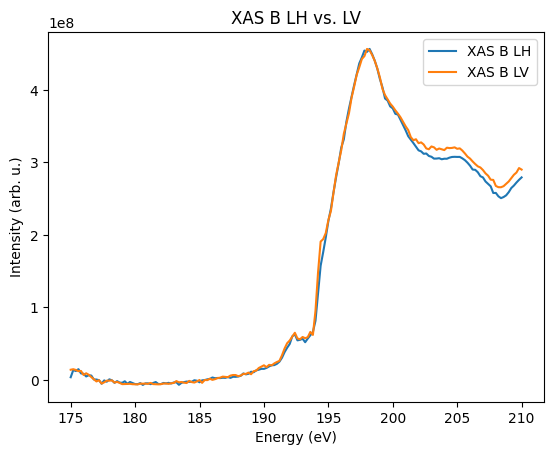

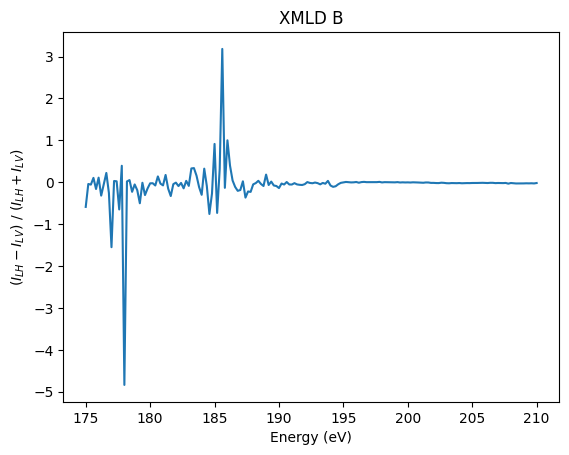

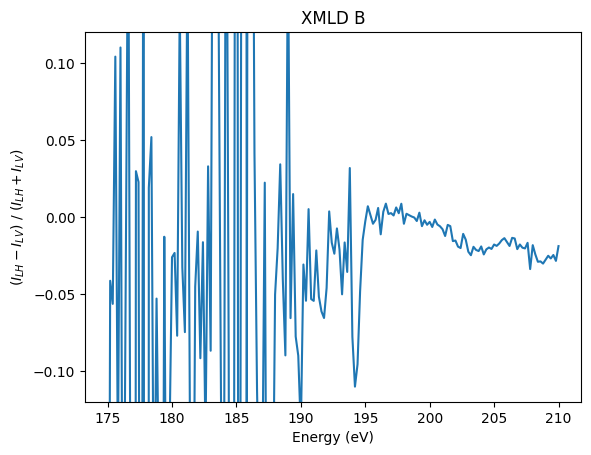

In [55]:
## read and plot XAS of B edge

filepath = r'C:\Users\jskolaut\Seafile\My Library\Beamtime_2410_MAXIV_DyIG\Analysis\cBN'
XAS_B_LH_filename = 'XAS_LH_B.txt'
XAS_B_LV_filename = 'XAS_LV_B.txt'
zprof_name = 'duplicate0_Zprof0'

E_start, E_step = 175, 0.2 # in eV
bkgfit_start_ind, bkgfit_end_ind = 0, 75
LV_scaling_fac = 4.5/6

# XAS_B_LH_Es, XAS_B_LH_Is_lincorr_scaled = XAS_MAXPEEM_extract_lincorr_scaleLV (filepath, XAS_B_LH_filename, zprof_name, E_start, E_step, 
#                                                               bkgfit_start_ind = bkgfit_start_ind, bkgfit_end_ind = bkgfit_end_ind)

# XAS_B_LV_Es, XAS_B_LV_Is_lincorr_scaled = XAS_MAXPEEM_extract_lincorr_scaleLV (filepath, XAS_B_LV_filename, zprof_name, E_start, E_step, 
#                                                               bkgfit_start_ind = bkgfit_start_ind, bkgfit_end_ind = bkgfit_end_ind, 
#                                                               LV_scaling_fac = LV_scaling_fac)

XAS_B_LH_Es, XAS_B_LH_Is_lincorr_scaled, XAS_B_LV_Es, XAS_B_LV_Is_lincorr_scaled = XAS_MAXPEEM_extract_lincorr_x2_autoscaleFile2(filepath, 
                                                    XAS_B_LH_filename, XAS_B_LV_filename, zprof_name, E_start, E_step, 
                                                    bkgfit_start_ind = bkgfit_start_ind, bkgfit_end_ind = bkgfit_end_ind)

plt_XAS_B, ax_XAS_B = plt.subplots()

ax_XAS_B.plot(XAS_B_LH_Es, XAS_B_LH_Is_lincorr_scaled, label = 'XAS B LH')
ax_XAS_B.plot(XAS_B_LV_Es, XAS_B_LV_Is_lincorr_scaled, label = 'XAS B LV')
ax_XAS_B.set_xlabel('Energy (eV)')
ax_XAS_B.set_ylabel('Intensity (arb. u.)')
ax_XAS_B.set_title('XAS B LH vs. LV')
ax_XAS_B.legend()


fig_XMLD_B, ax_XMLD_B = plt.subplots()

ax_XMLD_B.plot(XAS_B_LH_Es, (XAS_B_LH_Is_lincorr_scaled - XAS_B_LV_Is_lincorr_scaled) / (XAS_B_LH_Is_lincorr_scaled + XAS_B_LV_Is_lincorr_scaled) )
ax_XMLD_B.set_xlabel('Energy (eV)')
ax_XMLD_B.set_ylabel(r'$(I_{LH} - I_{LV})$ / $(I_{LH} + I_{LV})$')
ax_XMLD_B.set_title('XMLD B')
#ax_XMLD_B.set_ylim([-0.12,0.12])

fig_XMLD_B_zoom, ax_XMLD_B_zoom = plt.subplots()

ax_XMLD_B_zoom.plot(XAS_B_LH_Es, (XAS_B_LH_Is_lincorr_scaled - XAS_B_LV_Is_lincorr_scaled) / (XAS_B_LH_Is_lincorr_scaled + XAS_B_LV_Is_lincorr_scaled) )
ax_XMLD_B_zoom.set_xlabel('Energy (eV)')
ax_XMLD_B_zoom.set_ylabel(r'$(I_{LH} - I_{LV})$ / $(I_{LH} + I_{LV})$')
ax_XMLD_B_zoom.set_title('XMLD B')
ax_XMLD_B_zoom.set_ylim([-0.12,0.12])


Text(0.5, 1.0, 'XMLD N')

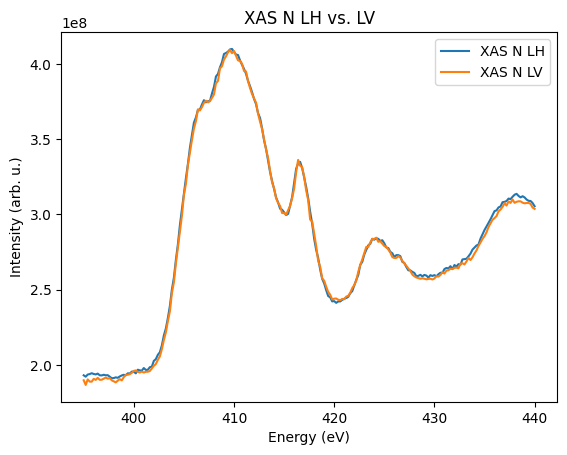

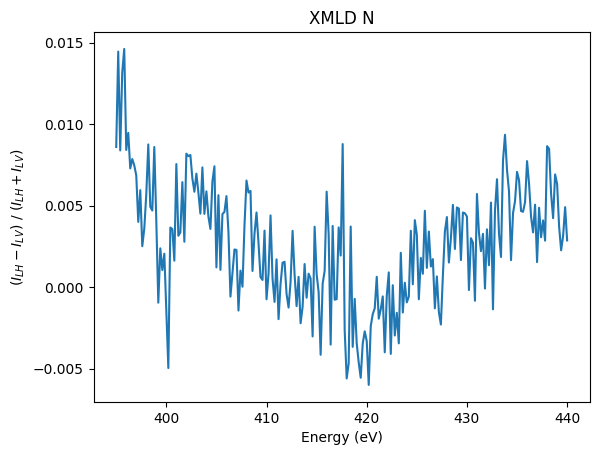

In [56]:
## read and plot XAS of N edge

filepath = r'C:\Users\jskolaut\Seafile\My Library\Beamtime_2410_MAXIV_DyIG\Analysis\cBN'
XAS_N_LH_filename = 'XAS_N_LH.txt'
XAS_N_LV_filename = 'XAS_N_LV.txt'
zprof_name = 'duplicate0_Zprof0'

E_start, E_step = 395, 0.2 # in eV
bkgfit_start_ind, bkgfit_end_ind = 0, 10
LV_scaling_fac = 1.08
LV_offset = 1.5e7

XAS_N_LH_Es, XAS_N_LH = XAS_MAXPEEM_extract_scaleLV (filepath, XAS_N_LH_filename, zprof_name, E_start, E_step)

XAS_N_LV_Es, XAS_N_LV_scaled = XAS_MAXPEEM_extract_scaleLV (filepath, XAS_N_LV_filename, zprof_name, E_start, E_step, 
                                                              LV_scaling_fac = LV_scaling_fac)

# XAS_N_LH_Es, XAS_N_LH_Is_lincorr, XAS_N_LV_Es, XAS_N_LV_Is_lincorr_scaled = XAS_MAXPEEM_extract_lincorr_x2_autoscaleFile2(filepath, 
#                                                     XAS_N_LH_filename, XAS_N_LV_filename, zprof_name, E_start, E_step, 
#                                                     bkgfit_start_ind = bkgfit_start_ind, bkgfit_end_ind = bkgfit_end_ind)

plt_XAS_N, ax_XAS_N = plt.subplots()

ax_XAS_N.plot(XAS_N_LH_Es, XAS_N_LH, label = 'XAS N LH')
ax_XAS_N.plot(XAS_N_LV_Es, XAS_N_LV_scaled-LV_offset, label = 'XAS N LV')
ax_XAS_N.set_xlabel('Energy (eV)')
ax_XAS_N.set_ylabel('Intensity (arb. u.)')
ax_XAS_N.set_title('XAS N LH vs. LV')
ax_XAS_N.legend()


fig_XMLD_N, ax_XMLD_N = plt.subplots()

ax_XMLD_N.plot(XAS_N_LH_Es, (XAS_N_LH - (XAS_N_LV_scaled-LV_offset)) / (XAS_N_LH + (XAS_N_LV_scaled-LV_offset)) )
ax_XMLD_N.set_xlabel('Energy (eV)')
ax_XMLD_N.set_ylabel(r'$(I_{LH} - I_{LV})$ / $(I_{LH} + I_{LV})$')
ax_XMLD_N.set_title('XMLD N')
#ax_XMLD_N.set_ylim([-0.12,0.12])




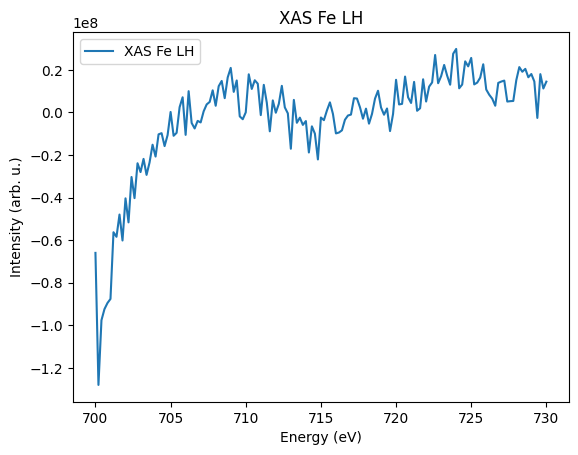

In [58]:
## read and plot XAS of Fe edge

filepath = r'C:\Users\jskolaut\Seafile\My Library\Beamtime_2410_MAXIV_DyIG\Analysis\cBN'
XAS_Fe_LH_filename = 'XAS_Fe_LH.txt'
zprof_name = r'XAS_Zprof0'

E_start, E_step = 700, 0.2 # in eV
bkgfit_start_ind, bkgfit_end_ind = 20, 100
LV_scaling_fac = 1.08
LV_offset = 1.5e7


XAS_Fe_LH_Es, XAS_Fe_LH = XAS_MAXPEEM_extract_lincorr_scaleLV (filepath, XAS_Fe_LH_filename, zprof_name, E_start, E_step,
                                                                bkgfit_start_ind = bkgfit_start_ind, bkgfit_end_ind = bkgfit_end_ind)



plt_XAS_Fe, ax_XAS_Fe = plt.subplots()

ax_XAS_Fe.plot(XAS_Fe_LH_Es, XAS_Fe_LH, label = 'XAS Fe LH')
ax_XAS_Fe.set_xlabel('Energy (eV)')
ax_XAS_Fe.set_ylabel('Intensity (arb. u.)')
ax_XAS_Fe.set_title('XAS Fe LH')
ax_XAS_Fe.legend()


# Deprecated

In [ ]:
## data import
filepath = r'C:\Users\jskolaut\Seafile\My Library\Beamtime_2410_MAXIV_DyIG\Analysis\cBN'
XAS_B_LH_filename = 'XAS_LH_B.txt'
XAS_B_LV_filename = 'XAS_LV_B.txt'

E_start, E_step = 175, 0.2 # in eV

bkgfit_start_ind, bkgfit_end_ind = 0, 75

LV_scaling_fac = 4.5/6


XAS_B_LH_datapath = os.path.join(filepath, XAS_B_LH_filename)

XAS_B_LV_datapath = os.path.join(filepath, XAS_B_LV_filename)


XAS_B_LH_df = pd.read_csv(XAS_B_LH_datapath, delimiter = '\t', header = 0)['duplicate0_Zprof0']
XAS_B_LH_Is = np.array(XAS_B_LH_df)
XAS_B_LH_Es = np.arange(E_start, E_start + E_step * len(XAS_B_LH_Is), E_step) # in eV

XAS_B_LV_df = pd.read_csv(XAS_B_LV_datapath, delimiter = '\t', header = 0)['duplicate0_Zprof0']
XAS_B_LV_Is = np.array(XAS_B_LV_df)
XAS_B_LV_Es = np.arange(E_start, E_start + E_step * len(XAS_B_LV_Is), E_step) # in eV

## remove background

XAS_B_LH_popt_linbkg, XAS_B_LH_pcov_linbkg = curve_fit(linfunc, XAS_B_LH_Es[bkgfit_start_ind:bkgfit_end_ind], XAS_B_LH_Is[bkgfit_start_ind:bkgfit_end_ind])
XAS_B_LV_popt_linbkg, XAS_B_LV_pcov_linbkg = curve_fit(linfunc, XAS_B_LV_Es[bkgfit_start_ind:bkgfit_end_ind], XAS_B_LV_Is[bkgfit_start_ind:bkgfit_end_ind])

XAS_B_LH_Is_lincorr = XAS_B_LH_Is - linfunc(XAS_B_LH_Es, *XAS_B_LH_popt_linbkg)
XAS_B_LV_Is_lincorr = XAS_B_LV_Is - linfunc(XAS_B_LV_Es, *XAS_B_LV_popt_linbkg)

XAS_B_LV_Is_lincorr_scaled = LV_scaling_fac * XAS_B_LV_Is_lincorr

#print(XAS_B_LH_Es[70])


## plotting

plt_XAS_B, ax_XAS_B = plt.subplots()

ax_XAS_B.plot(XAS_B_LH_Es, XAS_B_LH_Is_lincorr, label = 'XAS B LH')
ax_XAS_B.plot(XAS_B_LV_Es, XAS_B_LV_Is_lincorr_scaled, label = 'XAS B LV')
#ax_XAS_B.plot(XAS_B_LH_Es, linfunc(XAS_B_LH_Es, *popt_linbkg))
ax_XAS_B.set_xlabel('Energy (eV)')
ax_XAS_B.set_ylabel('Intensity (arb. u.)')
ax_XAS_B.legend()


